# Multinomial Logistics Regression (Softmax Regression)

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data from iris data

df = sns.load_dataset("iris")    

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
#change species data 

encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[["sepal_length", "petal_length", "species"]]

In [8]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [9]:
df.shape

(150, 3)

In [10]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [11]:
X.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [12]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
clf = LogisticRegression(multi_class="multinomial")

In [14]:
clf.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [15]:
Y_pred = clf.predict(X_test)

In [16]:
Y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [17]:
print(accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [18]:
pd.DataFrame(confusion_matrix(Y_test, Y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [19]:
# prediction

query = np.array([[3.4,2.7]])
clf.predict_proba(query)

C:\Python 3.10\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [20]:
clf.predict(query)

C:\Python 3.10\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Python 3.10\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


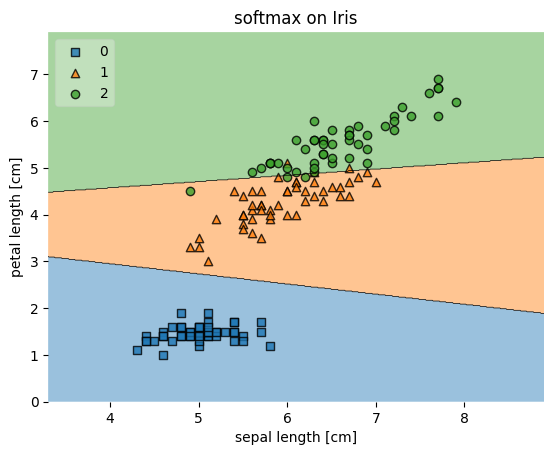

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, Y.values, clf, legend=2)

plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.title("softmax on Iris")
plt.show()
